In [ ]:
import pandahouse as ph
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [3]:
connection_test = dict(database='test',
                  host='http://clickhouse.beslan.pro:8080',
                  user='student-rw',
                  password='656e2b0c9c')

In [4]:
# задание 3
q = '''
    SELECT
        room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$, ]','')) as room_type_mod
    FROM {db}.ldn_listings
    ORDER BY id ASC
    LIMIT 1000
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
new_df = q_test.groupby('room_type').quantile(0.75)
new_df 

,room_type_mod
room_type,
Entire home/apt,160.00
Hotel room,157.00
Private room,70.00
Shared room,69.25


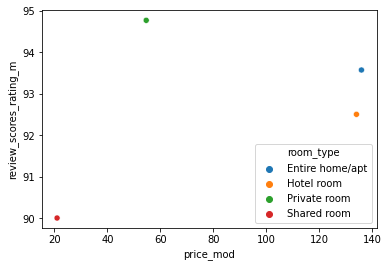

In [5]:
#задание4
q = '''
    SELECT
        room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$, ]','')) as price_mod,
        toFloat32OrNull(review_scores_rating) as review_scores_rating_m
    FROM {db}.ldn_listings
    WHERE review_scores_rating_m != NaN
    LIMIT 1000
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
new_df = q_test.groupby('room_type', as_index=False) \
    .agg({'price_mod': 'mean', 
        'review_scores_rating_m': 'mean'})
sns.scatterplot(data=new_df, x='price_mod', y='review_scores_rating_m', hue='room_type')

In [6]:
#задание 5
q = '''
    SELECT
        DISTINCT host_id,
        host_verifications
    FROM {db}.ldn_listings
    WHERE experiences_offered != 'none' 
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
q_test.host_verifications.apply(lambda c: c.strip('[]').replace("'", "").split(',')).explode().value_counts()

 phone                    1345
email                     1345
 reviews                  1309
 government_id            1196
 jumio                    1115
 offline_government_id     469
 work_email                279
 facebook                  270
 selfie                    252
 identity_manual           227
 manual_offline             70
 google                     34
 kba                        27
 manual_online              16
phone                       16
 sent_id                     6
Name: host_verifications, dtype: int64

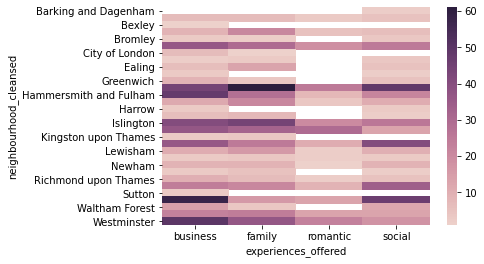

In [7]:
#задание 6
q = '''
    SELECT
    neighbourhood_cleansed,
    experiences_offered,
    count(experiences_offered) as experience_count
FROM  
    ldn_listings
WHERE experiences_offered != 'none'
GROUP BY neighbourhood_cleansed, experiences_offered
ORDER BY experience_count DESC
LIMIT 100
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
abc = q_test.pivot(index='neighbourhood_cleansed', columns='experiences_offered', values='experience_count')
sns.heatmap(abc, cmap=sns.cubehelix_palette(as_cmap=True))

In [8]:
#задание 7
q = '''
    SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) as price_mode
FROM ldn_listings
WHERE experiences_offered != 'none'
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
q_test

,room_type,price_mode
0,Private room,65.0
1,Entire home/apt,100.0
2,Private room,150.0
3,Private room,45.0
4,Private room,25.0
...,...,...
1543,Entire home/apt,100.0
1544,Entire home/apt,125.0
1545,Entire home/apt,185.0
1546,Entire home/apt,110.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/tljh/user/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


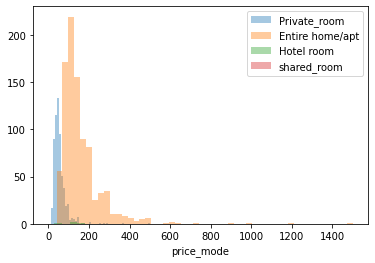

In [9]:
sns.distplot(q_test.query("room_type == 'Private room'").price_mode, kde=False, label='Private_room')
sns.distplot(q_test.query("room_type == 'Entire home/apt'").price_mode, kde=False, label='Entire home/apt')
sns.distplot(q_test.query("room_type =='Hotel room'").price_mode, kde=False, label='Hotel room')
sns.distplot(q_test.query("room_type=='shared_room'").price_mode, kde=False, label='shared_room')
plt.legend()
plt.show()

NameError: name 'np_log' is not defined

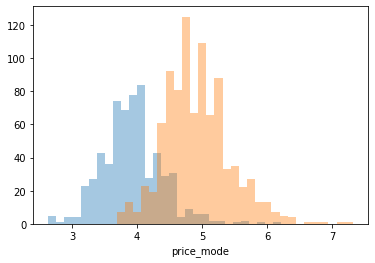

In [10]:
sns.distplot(np.log(q_test.query("room_type == 'Private room'").price_mode), kde=False, label='Private_room')
sns.distplot(np.log(q_test.query("room_type == 'Entire home/apt'").price_mode), kde=False, label='Entire home/apt')
sns.distplot(np_log(q_test.query("room_type =='Hotel room'").price_mode), kde=False, label='Hotel room')
sns.distplot(np.log(q_test.query("room_type=='shared_room'").price_mode), kde=False, label='shared_room')
plt.legend()
plt.show()

In [11]:
#задание 8
q = '''
    SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')),
    first_review
FROM ldn_listings
WHERE first_review > '2010-01-01'
LIMIT 1000
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
q_test

,room_type,"toFloat32OrNull(replaceRegexpAll(price, \'[$,]\', \'\'))",first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24
